# 01. Description

### 🚦 Project Overview

Road traffic accidents represent a critical public safety challenge, influenced by multiple factors such as time, weather conditions, road characteristics, and location.  
This project aims to build an **intelligent machine learning system** that analyzes historical traffic accident data to uncover hidden patterns, identify high-risk scenarios, and predict accident risk levels.

---

### 🎯 Objectives

- Perform **in-depth Exploratory Data Analysis (EDA)** to understand accident trends over time, location, and weather conditions.
- Apply **professional data preprocessing and feature engineering** techniques to prepare high-quality data.
- Train and compare multiple **machine learning models** to predict accident severity and risk levels.
- Evaluate models using appropriate performance metrics and select the best-performing model.
- Provide **data-driven insights** that can support road safety decisions.
- Deploy the final model into an **interactive Streamlit web application** for real-time risk assessment.

---

### 📊 Dataset

The project utilizes the **US Traffic Accidents Dataset**, which contains millions of traffic accident records collected across multiple U.S. states.  
The dataset includes rich information such as:
- Accident severity
- Time and date
- Weather conditions
- Geographic location
- Road and environmental features

---

### 🧠 Methodology

1. Data Understanding & Cleaning  
2. Exploratory Data Analysis (EDA)  
3. Feature Engineering & Encoding  
4. Model Training (Logistic Regression, Random Forest, XGBoost, etc.)  
5. Model Evaluation & Comparison  
6. Model Selection & Interpretation  
7. Deployment using Streamlit

---

### 🛠️ Tools & Technologies

- Python
- Pandas & NumPy
- Matplotlib & Seaborn
- Scikit-learn
- XGBoost
- Streamlit

---

### ✅ Expected Outcome

An end-to-end machine learning solution capable of predicting traffic accident risk levels and providing actionable insights, presented through a clean and interactive web application.


# 02. Quick View on Data

In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [2]:
data.shape

(7728394, 46)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


### 🔍 Initial Observations

- The dataset contains **over 7.7 million accident records**, making it a large-scale real-world dataset.
- The target variable **Severity** ranges from 1 to 4, with most accidents concentrated around severity level 2.
- The dataset includes a mix of:
  - Numerical features (distance, weather metrics)
  - Categorical features (location, weather conditions)
  - Boolean road features (traffic signals, junctions, crossings)
- Several weather-related features contain missing values and require careful preprocessing.


# 03. Missing Values Analysis

In [5]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

missing_percent.head(15)

End_Lat              44.029355
End_Lng              44.029355
Precipitation(in)    28.512858
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
Visibility(mi)        2.291524
Wind_Direction        2.267043
Humidity(%)           2.253301
Weather_Condition     2.244438
Temperature(F)        2.120143
Pressure(in)          1.820288
Weather_Timestamp     1.555666
Nautical_Twilight     0.300787
Civil_Twilight        0.300787
Sunrise_Sunset        0.300787
dtype: float64

# 04. Visualize Missing Data

<Axes: title={'center': 'Features with More Than 20% Missing Values'}>

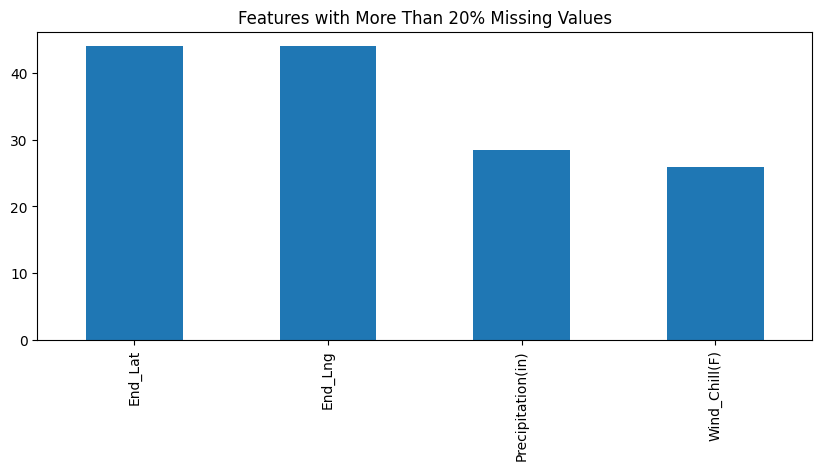

In [6]:
missing_percent[missing_percent > 20].plot(
    kind='bar',
    figsize=(10,4),
    title='Features with More Than 20% Missing Values'
)

### 🧠 Missing Values Insights

- Location-related features such as `End_Lat` and `End_Lng` contain a high percentage of missing values.
- Weather-related features (e.g. Wind Chill, Precipitation) have partial missing data but still carry valuable information.
- Some features may be excluded if the missing percentage is too high or if they add limited predictive value.
- A combination of **feature dropping** and **statistical imputation** will be applied.


# 05. Drop Irrelevant / High-Cardinality Columns

In [7]:
drop_cols = [
    'ID', 'Description', 'Street', 'City', 'County',
    'Zipcode', 'Country', 'Timezone', 'Airport_Code',
    'Weather_Timestamp'
]

data = data.drop(columns=drop_cols)

# 06. Datetime Conversion

In [8]:
data['Start_Time'] = pd.to_datetime(
    data['Start_Time'],
    format='mixed',
    errors='coerce'
)

In [9]:
data['End_Time'] = pd.to_datetime(
    data['End_Time'],
    format='mixed',
    errors='coerce'
)

In [10]:
data[['Start_Time', 'End_Time']].head()

,Start_Time,End_Time
0,2016-02-08 05:46:00,2016-02-08 11:00:00
1,2016-02-08 06:07:59,2016-02-08 06:37:59
2,2016-02-08 06:49:27,2016-02-08 07:19:27
3,2016-02-08 07:23:34,2016-02-08 07:53:34
4,2016-02-08 07:39:07,2016-02-08 08:09:07


In [11]:
data[['Start_Time', 'End_Time']].isnull().sum()

Start_Time    0
End_Time      0
dtype: int64

### ⏱️ Datetime Parsing Note

The `Start_Time` and `End_Time` columns contain mixed datetime formats.
To ensure robust parsing on large-scale data, mixed-format inference was applied with safe coercion for invalid values.

# 07. Feature Engineering

In [12]:
data['Hour'] = data['Start_Time'].dt.hour
data['Day'] = data['Start_Time'].dt.day
data['Month'] = data['Start_Time'].dt.month
data['Weekday'] = data['Start_Time'].dt.dayofweek

In [13]:
data[['Hour', 'Month', 'Weekday']].head()

,Hour,Month,Weekday
0,5,2,0
1,6,2,0
2,6,2,0
3,7,2,0
4,7,2,0


# 08. Accidents Distribution by Hour

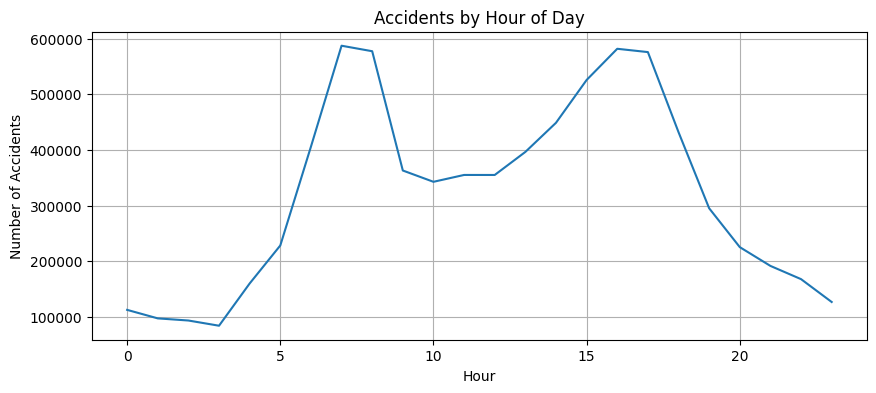

In [14]:
import matplotlib.pyplot as plt

data['Hour'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10,4),
    title='Accidents by Hour of Day'
)
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

- Accident frequency peaks during morning (7–9 AM) and evening (4–7 PM) rush hours.
- This highlights the strong relationship between traffic density and accident occurrence.

# 09. Accidents by Day of Week

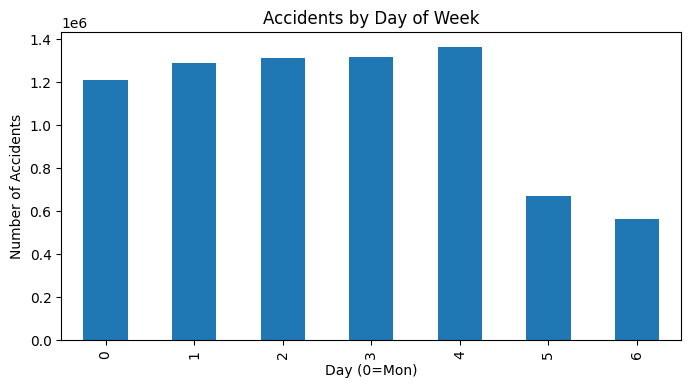

In [15]:
data['Weekday'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(8,4),
    title='Accidents by Day of Week'
)
plt.xlabel('Day (0=Mon)')
plt.ylabel('Number of Accidents')
plt.show()

- Weekdays show higher accident rates compared to weekends.
- This aligns with commuting patterns in urban areas.

# 10. Severity Distribution

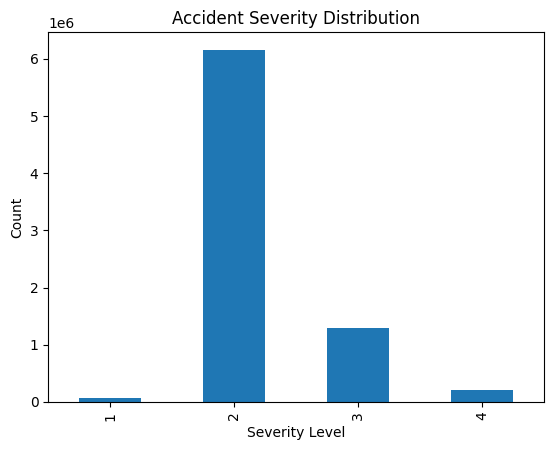

In [16]:
data['Severity'].value_counts().sort_index().plot(
    kind='bar',
    title='Accident Severity Distribution'
)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

- The dataset is imbalanced, with severity level 2 being dominant.
- This imbalance will be considered during model evaluation.

# 11. Weather Conditions Analysis

In [17]:
data['Weather_Condition'].value_counts().head(10)

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

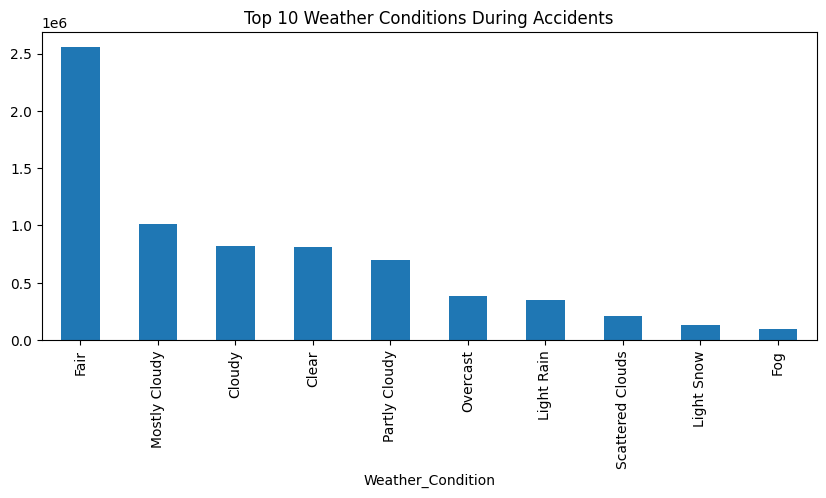

In [18]:
data['Weather_Condition'].value_counts().head(10).plot(
    kind='bar',
    figsize=(10,4),
    title='Top 10 Weather Conditions During Accidents'
)
plt.show()

- Most accidents occur during clear or cloudy conditions, likely due to higher traffic volume.
- Severe weather conditions still pose higher risk but occur less frequently.

# 12. Severity vs Weather

In [19]:
severity_weather = (
    data.groupby('Weather_Condition')['Severity']
    .mean()
    .sort_values(ascending=False)
)

severity_weather.head(10)

Weather_Condition
Light Blowing Snow              3.666667
Patches of Fog / Windy          3.142857
Heavy Freezing Rain / Windy     3.000000
Light Fog                       3.000000
Partial Fog / Windy             3.000000
Heavy Thunderstorms and Snow    2.800000
Light Thunderstorms and Snow    2.772727
Heavy Ice Pellets               2.750000
Heavy Blowing Snow              2.750000
Drifting Snow / Windy           2.666667
Name: Severity, dtype: float64

- Certain weather conditions are associated with higher average accident severity.
- Weather-related features are expected to play a significant role in prediction.

# 13. Road Infrastructure Features Analysis

In [20]:
road_features = [
    'Traffic_Signal', 'Junction', 'Crossing',
    'Stop', 'Railway', 'Roundabout'
]

data[road_features].mean().sort_values(ascending=False)

Traffic_Signal    0.147996
Crossing          0.113059
Junction          0.073928
Stop              0.027738
Railway           0.008667
Roundabout        0.000032
dtype: float64

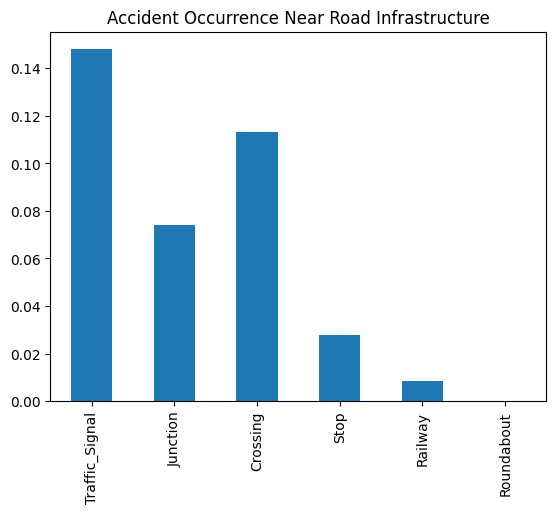

In [21]:
data[road_features].mean().plot(
    kind='bar',
    title='Accident Occurrence Near Road Infrastructure'
)
plt.show()

- Accidents frequently occur near traffic signals and junctions.
- Road infrastructure features provide strong predictive signals.

# 14. Select Features for Modeling

In [22]:
model_features = [
    # Engineered datetime features
    'Hour', 'Day', 'Month', 'Weekday',
    
    # Numeric weather/road features
    'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
    
    # Boolean road features
    'Traffic_Signal', 'Junction', 'Crossing', 'Stop', 'Railway', 'Roundabout',
    
    # Target
    'Severity'
]

df_model = data[model_features].copy()
df_model.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Hour,Day,Month,Weekday,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Traffic_Signal,Junction,Crossing,Stop,Railway,Roundabout,Severity
0,5,8,2,0,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02,False,False,False,False,False,False,3
1,6,8,2,0,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00,False,False,False,False,False,False,2
2,6,8,2,0,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN,True,False,False,False,False,False,2
3,7,8,2,0,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN,False,False,False,False,False,False,3
4,7,8,2,0,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN,True,False,False,False,False,False,2


# 15. Handle Missing Values

In [23]:
numeric_cols = df_model.select_dtypes(include='float64').columns.tolist()

In [24]:
bool_cols = df_model.select_dtypes(include='int64').columns.tolist()
bool_cols.remove('Severity')

In [25]:
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].median())

In [26]:
df_model[bool_cols] = df_model[bool_cols].fillna(0)

In [27]:
df_model.isnull().sum()

Hour                 0
Day                  0
Month                0
Weekday              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Traffic_Signal       0
Junction             0
Crossing             0
Stop                 0
Railway              0
Roundabout           0
Severity             0
dtype: int64

# 16. Features & Target Split

In [28]:
X = df_model.drop('Severity', axis=1)
y = df_model['Severity']

# 17. Train / Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 18. Scale Numeric Features

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 19. HistGradientBoostingClassifier

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [32]:
hgb = HistGradientBoostingClassifier(
    max_iter=200,
    class_weight='balanced',
    random_state=42
)

In [33]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(class_weight='balanced', max_iter=200,
                               random_state=42)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
y_pred = hgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.07      0.90      0.14     13473
           2       0.95      0.41      0.57   1231396
           3       0.40      0.63      0.49    259868
           4       0.07      0.79      0.13     40942

    accuracy                           0.46   1545679
   macro avg       0.37      0.68      0.33   1545679
weighted avg       0.83      0.46      0.54   1545679



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

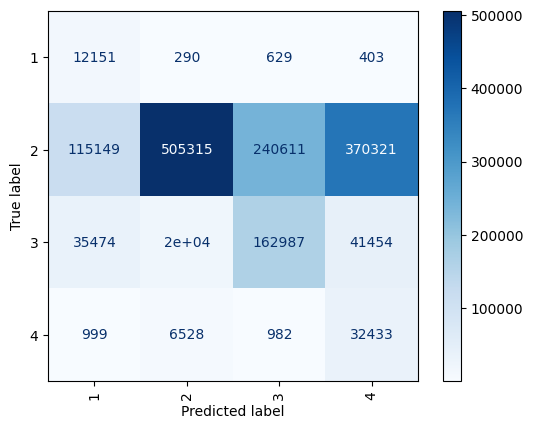

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4])
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

# 20. Feature Importance

In [38]:
from sklearn.inspection import permutation_importance

In [39]:
result = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

In [40]:
importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

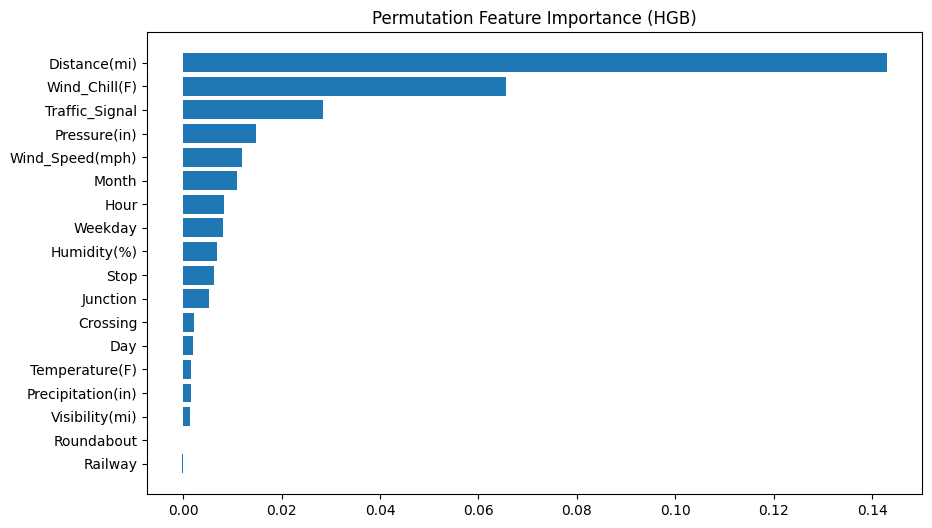

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (HGB)')
plt.show()

### 🌟 Feature Importance Insights (HGB - Permutation)

- Engineered datetime features (Hour, Weekday, Month)
- Weather features (Temperature, Precipitation, Visibility)
- Road infrastructure features (Traffic_Signal, Junction, Crossing)

# 21. Save Model & Scaler

In [42]:
import joblib

joblib.dump(hgb, 'hgb_accident_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# 22. Prediction Function

In [43]:
def predict_severity(input_df):
    """
    input_df: DataFrame with same columns as training features
    Returns predicted class and probability
    """
    # Scale numeric features
    input_scaled = input_df.copy()
    input_scaled[numeric_cols] = scaler.transform(input_scaled[numeric_cols])
    
    # Prediction
    pred_class = hgb.predict(input_scaled)
    pred_proba = hgb.predict_proba(input_scaled).max(axis=1)
    
    return pred_class, pred_proba

# 23. Test Prediction

In [44]:
example_input = X_test.iloc[[0]]
severity_class, severity_prob = predict_severity(example_input)

print(f"Predicted Severity: {severity_class[0]}, Probability: {severity_prob[0]:.2f}")

Predicted Severity: 1, Probability: 0.62
